In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#15): Which is digit '7'


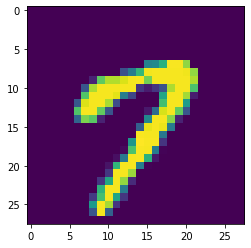

In [3]:
digit = 15 # Change to choose new digit
a = x_train[digit]
plt.imshow(a)
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

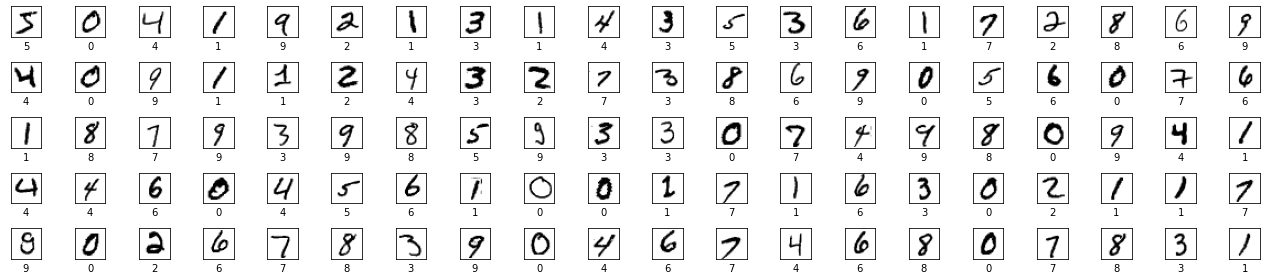

In [4]:
ROWS = 5
COLS = 20
i = 0

plt.figure(figsize=(18,4))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

In [5]:
x_train = x_train.reshape(-1, 28,28,1)/255
x_test = x_test.reshape(-1, 28,28,1)/255

In [6]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=(28,28,1)),
    
    ## hidden layers
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    ## output layer
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [7]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
h = model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.3838 - accuracy: 0.9220
Epoch 2/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0847 - accuracy: 0.9751
Epoch 3/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0700 - accuracy: 0.9801
Epoch 4/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0579 - accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0519 - accuracy: 0.9847
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0457 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0396 - accuracy: 0.98791s - - ETA: 0s - loss:
Epoch 8/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0359 - accuracy: 0.9894
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0319 - accuracy: 0.9905
Epoch 10/10
1875/1875 [===================